In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pydot
from IPython.core.display import Image

In [3]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
clf = DecisionTreeClassifier(random_state=777)
tree_full = clf.fit(X_train, y_train)

In [20]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

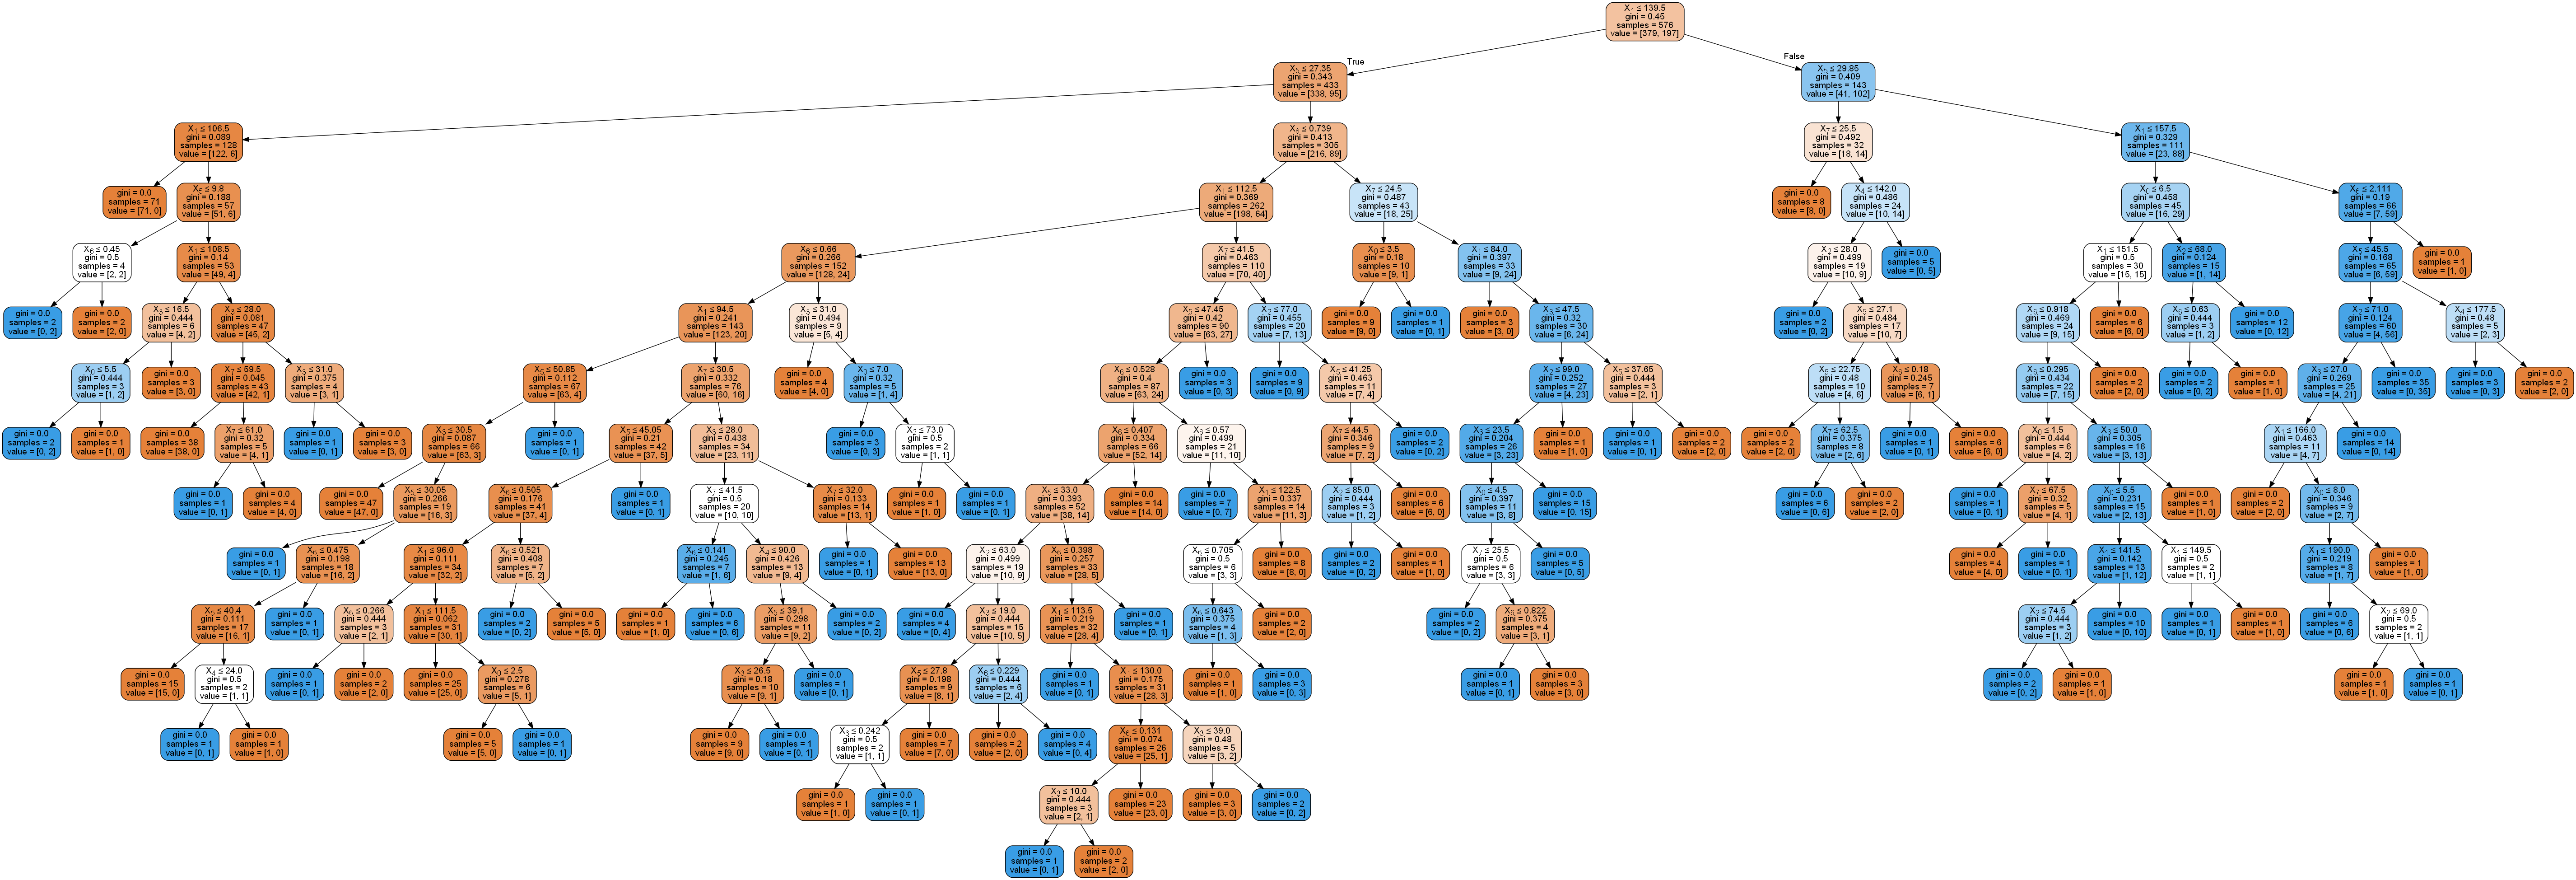

In [50]:
draw_decision_tree(tree_full, 
                   feature_names=X.columns.tolist(), 
                   class_names=[str(x) for x in y.unique().tolist()])

In [31]:
# overfitted.
print(accuracy_score(y_train, tree_full.predict(X_train)))
print(accuracy_score(y_test, tree_full.predict(X_test)))

1.0
0.6666666666666666


In [32]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.        , 0.00138889, 0.00150463, 0.0015191 , 0.00154321,
        0.00162037, 0.00163399, 0.00163399, 0.00166223, 0.00166934,
        0.00206391, 0.00222507, 0.00230369, 0.00231481, 0.00231481,
        0.00231481, 0.0023387 , 0.00236304, 0.00244502, 0.00252058,
        0.00256855, 0.00260417, 0.00284091, 0.00284799, 0.00291945,
        0.00292158, 0.00297619, 0.00297619, 0.00297619, 0.00308642,
        0.00311652, 0.003125  , 0.00321904, 0.00322421, 0.00336779,
        0.00343715, 0.00380726, 0.0038802 , 0.00409652, 0.00606061,
        0.00627121, 0.00638027, 0.00696023, 0.00696023, 0.00708912,
        0.00937965, 0.01048494, 0.01088723, 0.01457632, 0.01878051,
        0.09104675]),
 'impurities': array([0.        , 0.00277778, 0.0087963 , 0.01183449, 0.01492091,
        0.01816165, 0.02142963, 0.02796557, 0.03461451, 0.03795318,
        0.04414492, 0.05082013, 0.06003487, 0.06234969, 0.0646645 ,
        0.06929413, 0.07631023, 0.07867327, 0.08111829, 0.08868002

In [33]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.        , 0.00138889, 0.00150463, 0.0015191 , 0.00154321,
        0.00162037, 0.00163399, 0.00163399, 0.00166223, 0.00166934,
        0.00206391, 0.00222507, 0.00230369, 0.00231481, 0.00231481,
        0.00231481, 0.0023387 , 0.00236304, 0.00244502, 0.00252058,
        0.00256855, 0.00260417, 0.00284091, 0.00284799, 0.00291945,
        0.00292158, 0.00297619, 0.00297619, 0.00297619, 0.00308642,
        0.00311652, 0.003125  , 0.00321904, 0.00322421, 0.00336779,
        0.00343715, 0.00380726, 0.0038802 , 0.00409652, 0.00606061,
        0.00627121, 0.00638027, 0.00696023, 0.00696023, 0.00708912,
        0.00937965, 0.01048494, 0.01088723, 0.01457632, 0.01878051,
        0.09104675]),
 array([0.        , 0.00277778, 0.0087963 , 0.01183449, 0.01492091,
        0.01816165, 0.02142963, 0.02796557, 0.03461451, 0.03795318,
        0.04414492, 0.05082013, 0.06003487, 0.06234969, 0.0646645 ,
        0.06929413, 0.07631023, 0.07867327, 0.08111829, 0.08868002,
        0.09381713, 0.0990

In [39]:
clfs = []
i = 0
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=777, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_train)
    clfs.append(clf)
    i += 1

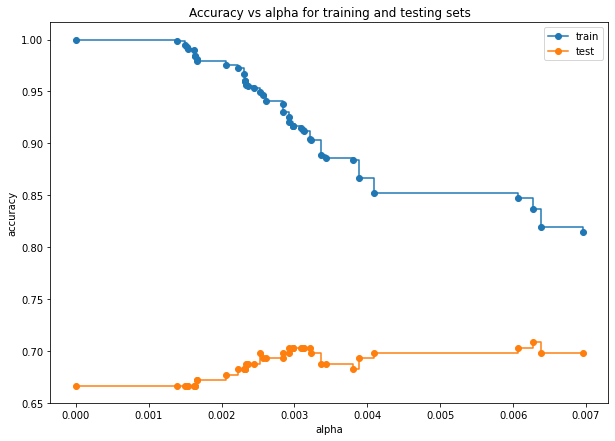

without pruning : 211 nodes, 0.667 accuracy
with the best pruning : 25 nodes, 0.708 accuracy


In [48]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(10, 7))
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
plt.legend()
plt.show()

print("without pruning : {0} nodes, {1:.3} accuracy".format(clfs[0].tree_.node_count, 
                                                                          clfs[0].score(X_test, y_test)))
print("with the best pruning : {0} nodes, {1:.3} accuracy".format(clfs[test_scores.index(max(test_scores))].tree_.node_count, 
                                                                  max(test_scores)))

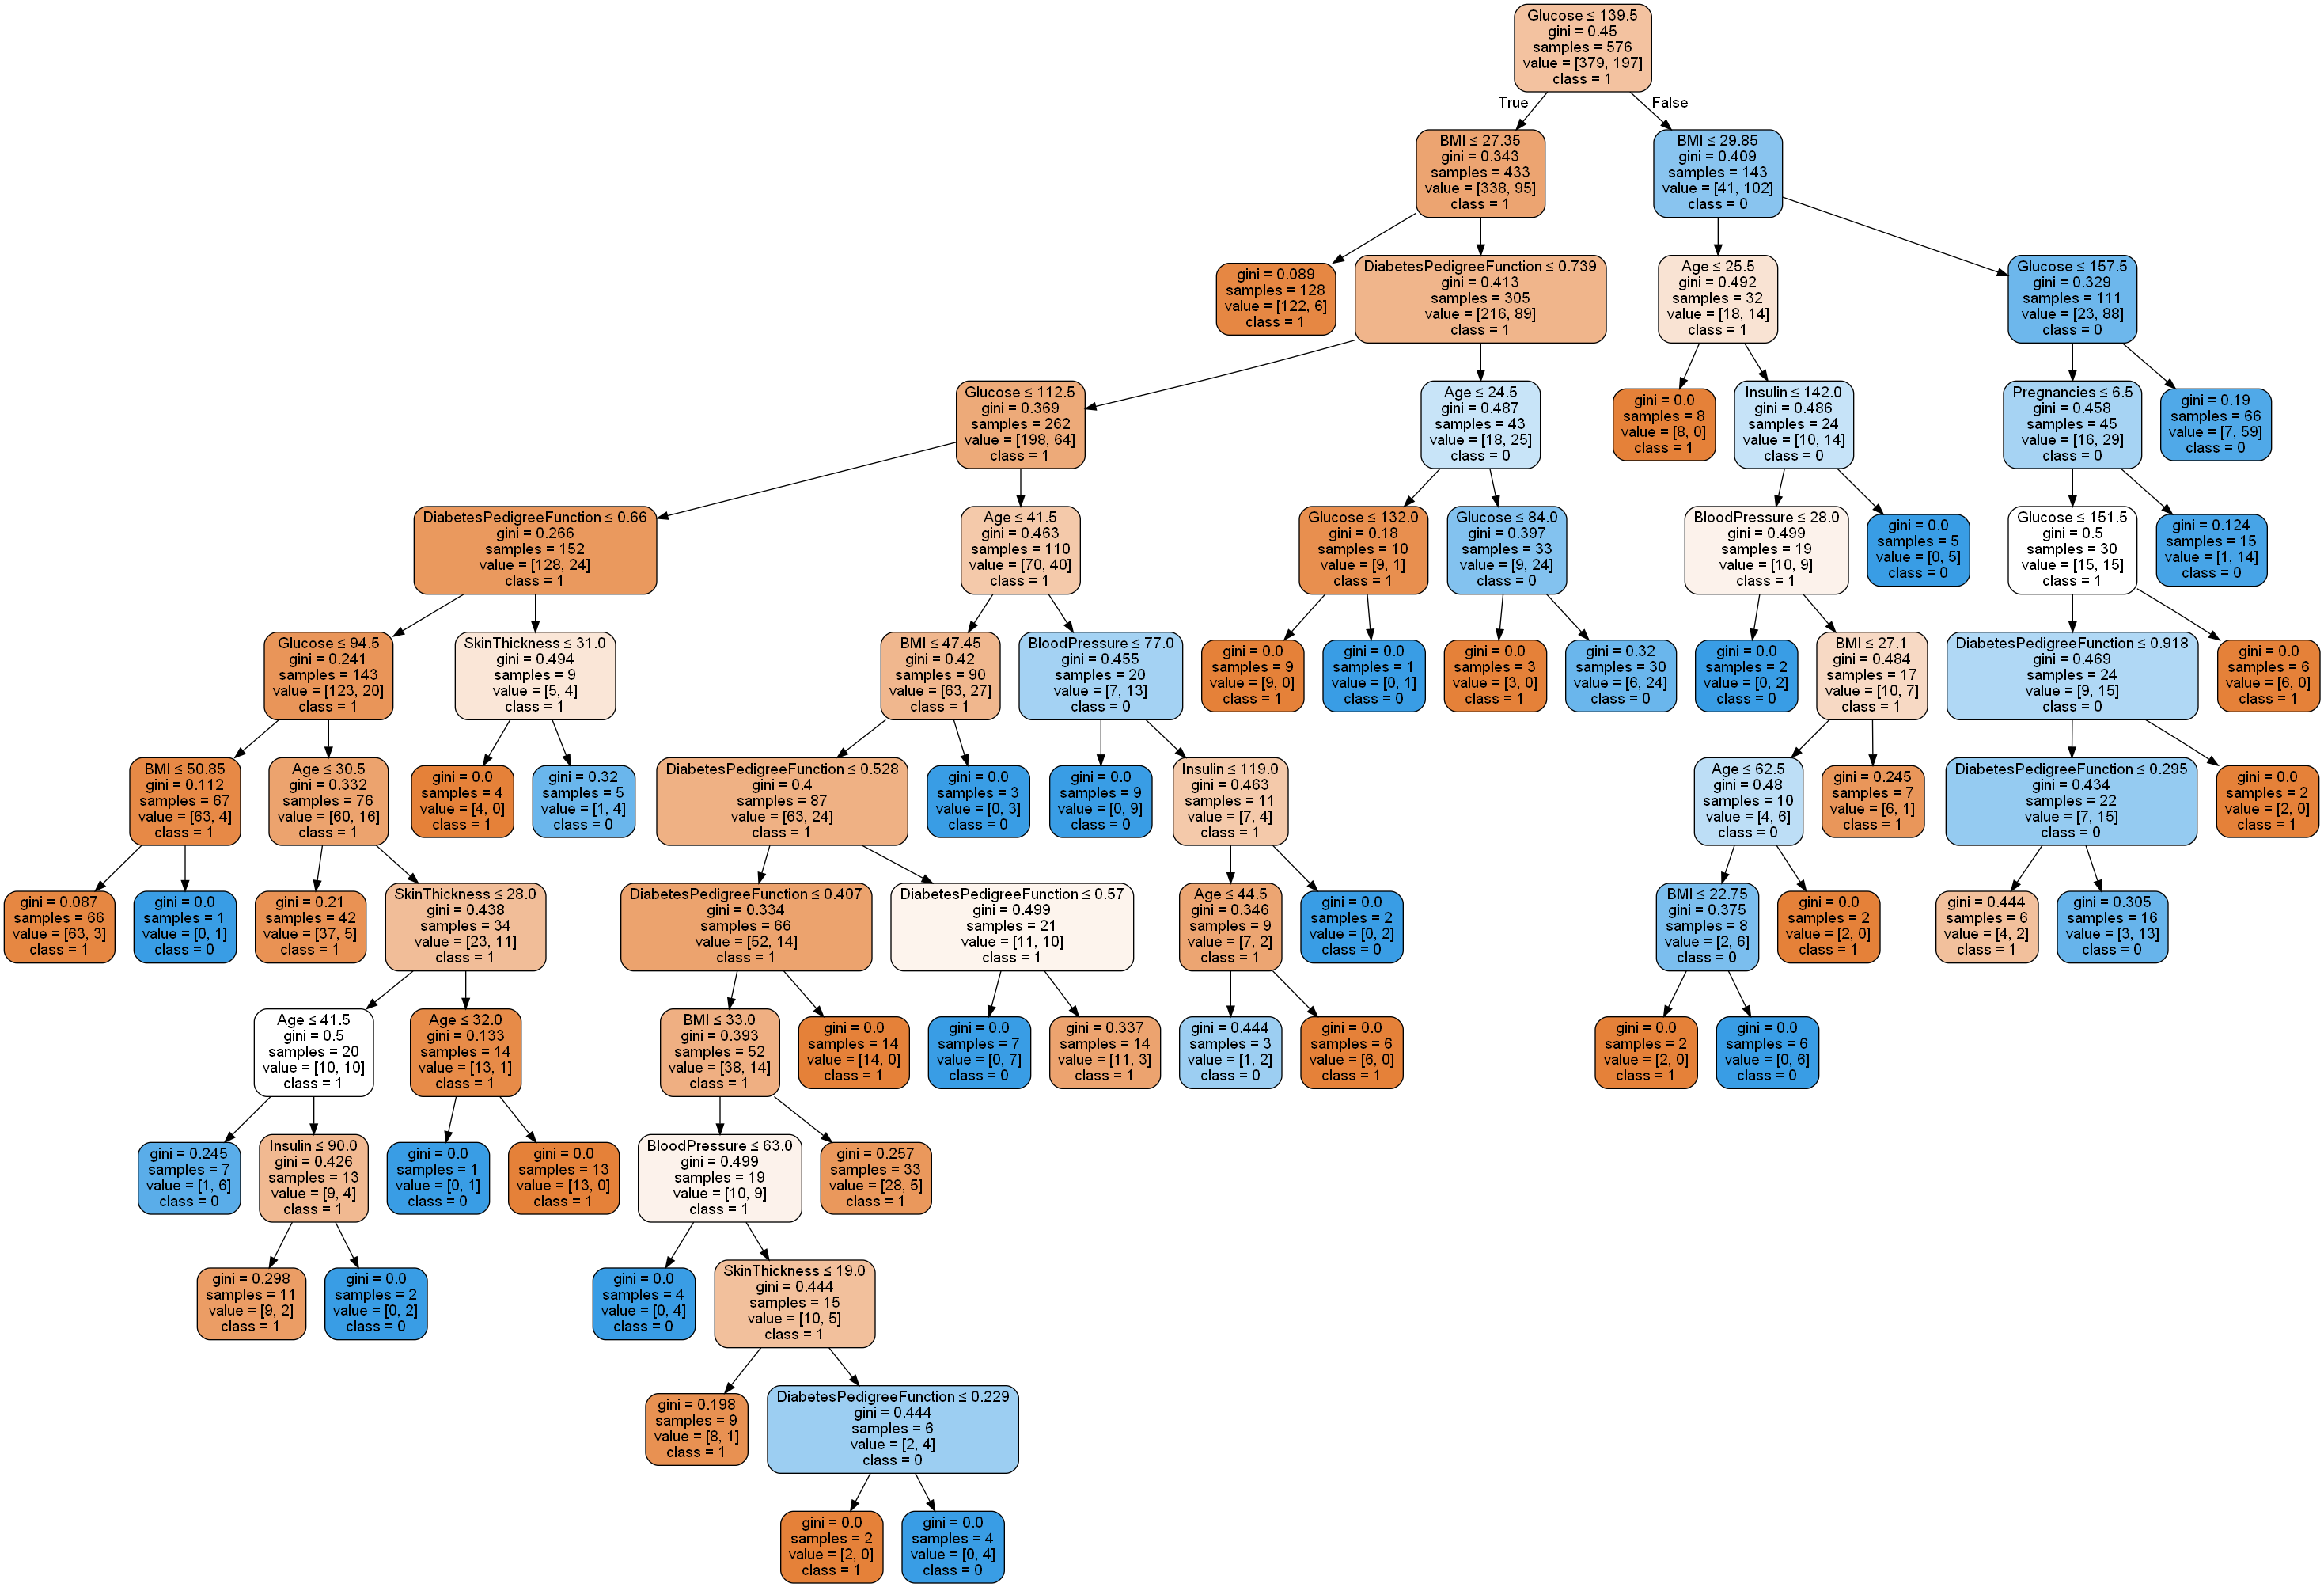

In [52]:
# best alpha = 0.003
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
clf = clf.fit(X_train, y_train)
draw_decision_tree(clf, feature_names=X.columns.tolist(), 
                   class_names=[str(x) for x in y.unique().tolist()])